In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Read csv file
cancer_data = pd.read_csv('/content/drive/MyDrive/deep_learning/project/feed_forward_nn/breast_cancer_wisconsin_(diagnostic)_kaggle/breat_cancer_wisconsin_kaggle.csv')

In [ ]:
# Visualize first 5 rows of the dataframe
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Check for null values
cancer_data.isna().sum()
# Found 1 column with null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Check if there's any other non null values in the column
cancer_data[cancer_data['Unnamed: 32'].notnull()]
# There's no other values than null in the column

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [ ]:
# Drop the 'Unnamed: 32' column
cancer_data2 = cancer_data.drop(columns=['Unnamed: 32'])

In [ ]:
# Analyse the features and we can drop if there's any features that are irrelevant
print(cancer_data2.columns)
# We are going to drop id column as its irrelevant

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
cancer_data3 = cancer_data2.drop(columns=['id'])

In [ ]:
# Split features and labels dataset
cancer_features = cancer_data3.drop(columns=['diagnosis'])
cancer_labels = cancer_data3['diagnosis']

In [ ]:
# Perform one hot coding for labels
cancer_labels_OH = pd.get_dummies(cancer_labels, drop_first=True)

In [ ]:
# Split the dateset into train-validation-test sets using 60:20:20 split
SEED = 12345
x_train, x_iter, y_train, y_iter = train_test_split(cancer_features,cancer_labels_OH,test_size=0.6,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_iter,y_iter,test_size=0.5,random_state=SEED)

In [ ]:
# Standardlize the data
standardizer = StandardScaler()
standardizer.fit(x_train)
x_train = standardizer.transform(x_train)
x_val = standardizer.transform(x_val)
x_test = standardizer.transform(x_test)

Model: "tbreast_cancer_wisconsin"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_56 (Dense)            (None, 64)                1984      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 2)                 34        
                                                                 
Total params: 4,626
Trainable params: 4,626
Non-trainable params: 0
_________________________________________________________________


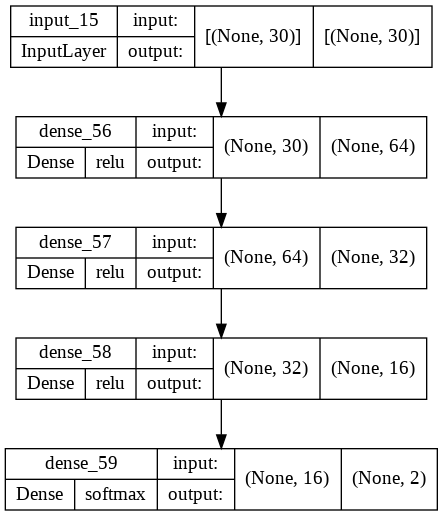

In [ ]:
# Model creation
# There are some regulization been added to overcome overfitting
nClass = len(np.unique(y_test))
l2_reg = tf.keras.regularizers.L2(0.07)
inputs = tf.keras.Input(shape=(x_train.shape[-1],))

dense = tf.keras.layers.Dense(64,activation='relu')
x = dense(inputs)
dense = tf.keras.layers.Dense(32,activation='relu',kernel_regularizer=l2_reg)
x = dense(x)
dense = tf.keras.layers.Dense(16,activation='relu',kernel_regularizer=l2_reg)
x = dense(x)
outputs = tf.keras.layers.Dense(nClass,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs,name='tbreast_cancer_wisconsin')
model.summary()
keras.utils.plot_model(model,to_file='breast_cancer_wisconsin.png',show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [ ]:
#Compile and train the model
EPOCHS=25
BATCH_SIZE=16
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/25
15/15 [==============================] - 1s 52ms/step - loss: 4.7382 - accuracy: 0.6432 - val_loss: 4.2513 - val_accuracy: 0.8304
Epoch 2/25
15/15 [==============================] - 0s 6ms/step - loss: 3.9744 - accuracy: 0.9031 - val_loss: 3.6388 - val_accuracy: 0.9357
Epoch 3/25
15/15 [==============================] - 0s 6ms/step - loss: 3.3957 - accuracy: 0.9471 - val_loss: 3.1217 - val_accuracy: 0.9591
Epoch 4/25
15/15 [==============================] - 0s 5ms/step - loss: 2.8965 - accuracy: 0.9604 - val_loss: 2.6732 - val_accuracy: 0.9591
Epoch 5/25
15/15 [==============================] - 0s 8ms/step - loss: 2.4759 - accuracy: 0.9736 - val_loss: 2.2973 - val_accuracy: 0.9649
Epoch 6/25
15/15 [==============================] - 0s 22ms/step - loss: 2.1257 - accuracy: 0.9780 - val_loss: 1.9823 - val_accuracy: 0.9649
Epoch 7/25
15/15 [==============================] - 0s 24ms/step - loss: 1.8282 - accuracy: 0.9780 - val_loss: 1.7125 - val_accuracy: 0.9591
Epoch 8/25
15/15 

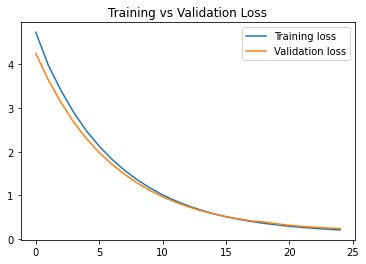

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot training vs validation loss
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

plt.plot(epochs,training_loss,label='Training loss',)
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.figure()
plt.show()

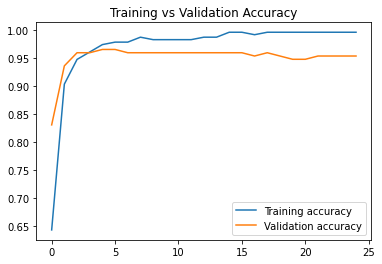

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot training vs validation accuracy
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = history.epoch

plt.plot(epochs,training_accuracy,label='Training accuracy')
plt.plot(epochs,val_accuracy,label='Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

In [ ]:
# Evaluate with test data for wild testing
test_result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print('------------------------Test Result----------------------------')
print(f"Test loss = {test_result[0]}")
print(f"Test accuracy = {test_result[1]}")

11/11 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9825
------------------------Test Result----------------------------
Test loss = 0.22774335741996765
Test accuracy = 0.9824561476707458
